# Neural Network from scratch

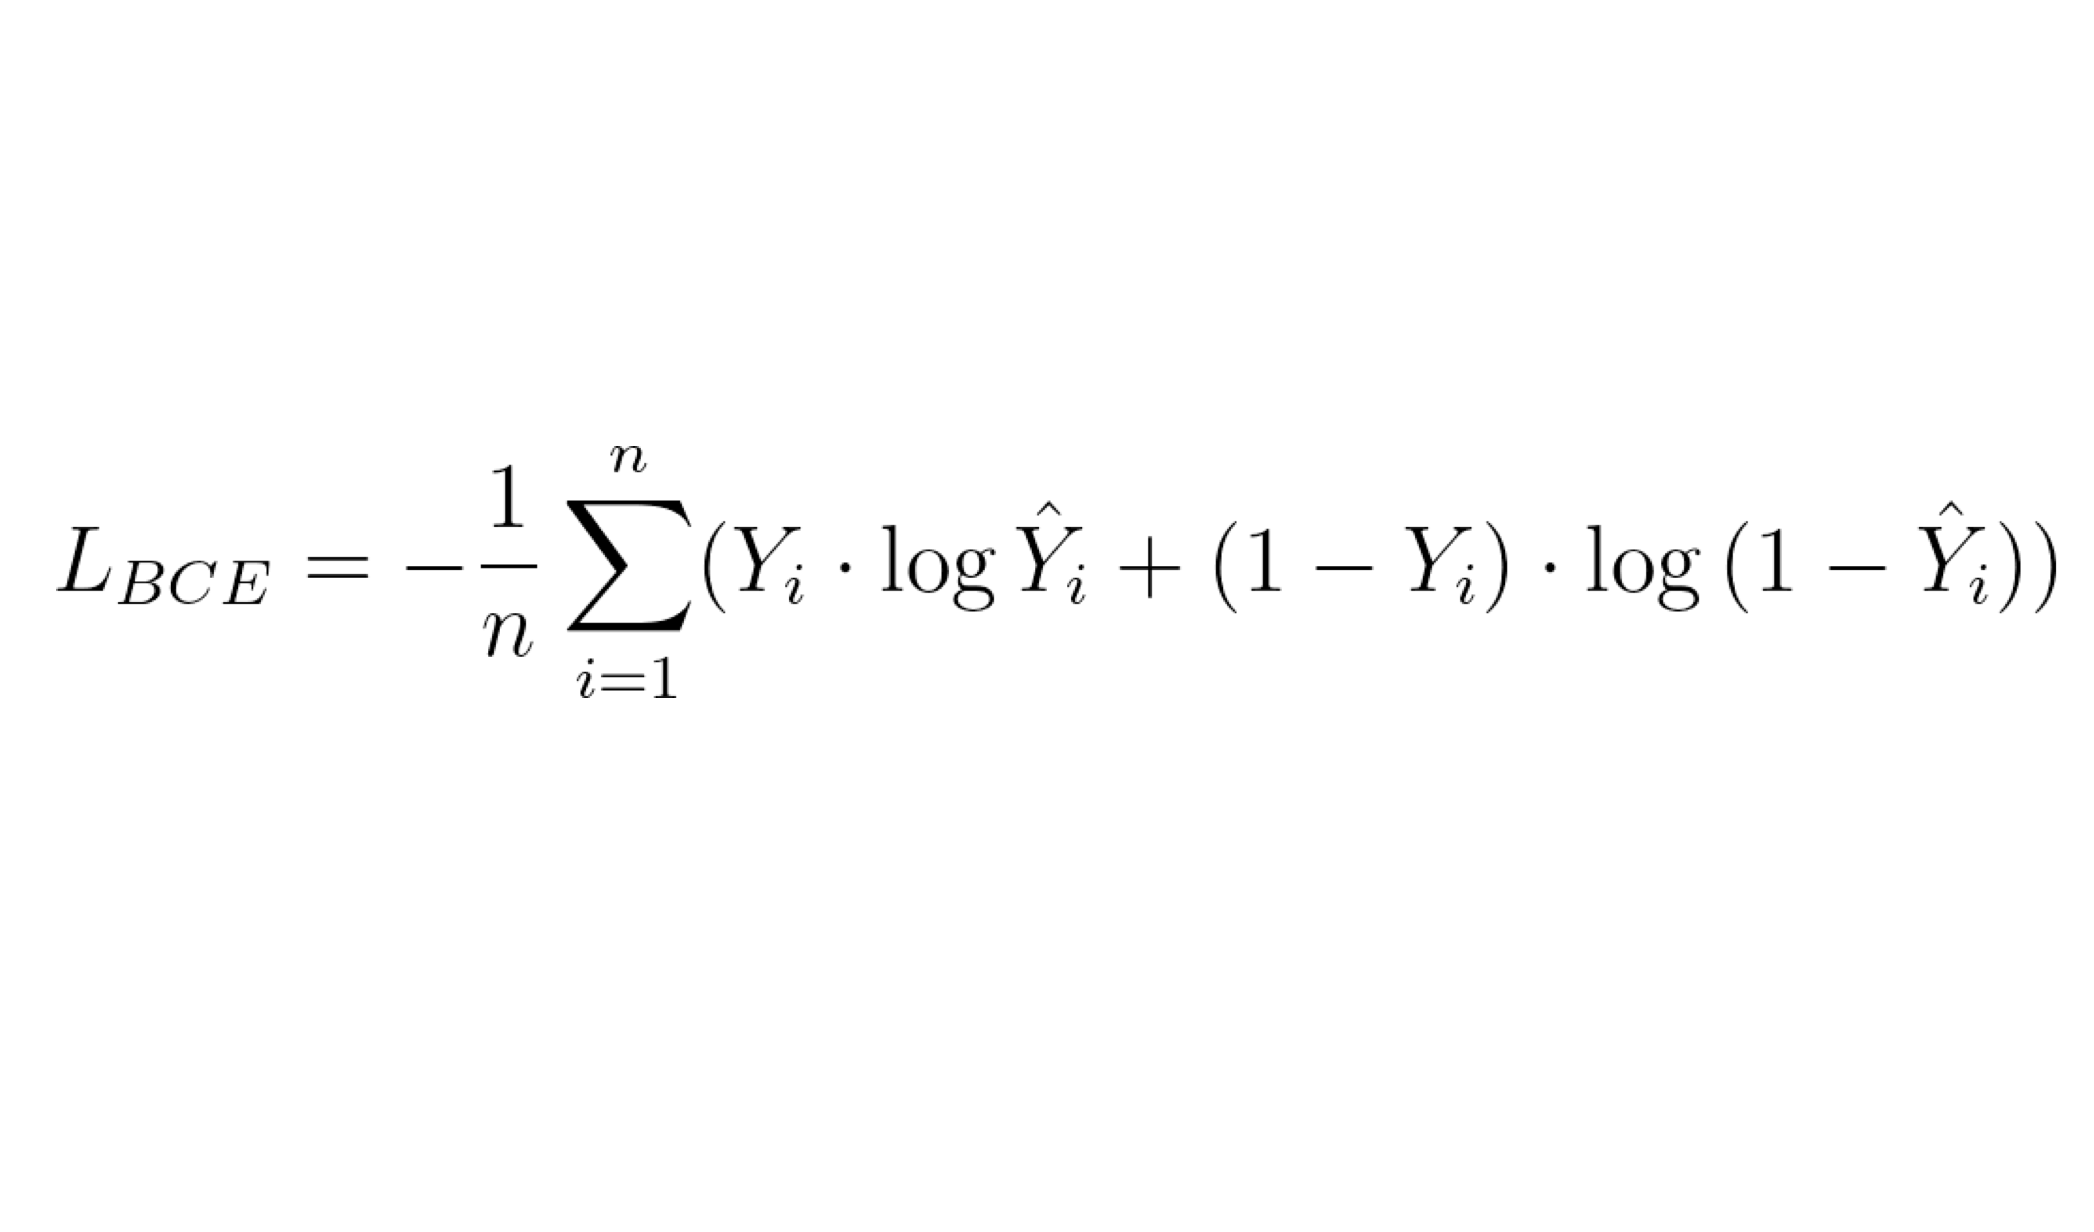

In [6]:
import numpy as np
import pandas as pd

In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
data = {'Age':[10,15,18,20,25,30,35,40,43,50,55,60,65,70],
       'MI':[5000,7000,18000,19000,22000,25000,35000,40000,42000,45000,55000,57000,60000,62000],
       'Insurance':[0,0,0,0,1,1,1,1,1,0,1,1,1,1]}

In [10]:
df = pd.DataFrame(data)

In [11]:
X = df[['Age','MI']]
X

,Age,MI
0,10,5000
1,15,7000
2,18,18000
3,20,19000
4,25,22000
5,30,25000
6,35,35000
7,40,40000
8,43,42000
9,50,45000


In [12]:
y = df.Insurance
y

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    1
Name: Insurance, dtype: int64

In [13]:
def sigmoid(x):
    return 1/(1+np.e**(-x))

In [14]:
# sigmoid(-10)

In [15]:
np.array(df['Age'])

array([10, 15, 18, 20, 25, 30, 35, 40, 43, 50, 55, 60, 65, 70],
      dtype=int64)

In [17]:
const_value = 1e-10
1-const_value

0.9999999999

In [19]:

# y_pred_new-y

In [20]:
epochs = 10
w1 = 1
w2 = 1
b = 1
lr = 0.01

for i in range(epochs):
    y_summ = w1*np.array(df['Age']) + w2*np.array(df['MI']) + b
    y_pred = sigmoid(np.array(y_summ))
    
    y_pred_new = []

    for i in y_pred:
        if i == 1:
            y_pred_new.append(1-const_value)
        else:
            y_pred_new.append(const_value)
    y_pred_new = np.array(y_pred_new)
    
    loss = -np.mean(y*np.log(y_pred_new) + (1-y)*np.log(1-y_pred_new))
    dl_dw1 = np.mean(df['Age']*(y_pred_new - y))
    dl_dw2 = np.mean(df['MI']*(y_pred_new - y))
    dl_db = np.mean((y_pred_new - y))
    
    w1 = w1 -  lr*dl_dw1
    
    w2 = w2 - lr*dl_dw2
    
    b = b - lr*dl_db
    
    print(loss,w1,w2,b)
    
    
    

8.223518159778605 0.919285714324 -66.14285710771429 0.9964285714295714
14.802332740711721 1.2214285714285715 218.14285714285717 1.002857142857143
8.223518159778605 1.1407142857525716 151.00000003514288 0.9992857142867143
8.223518159778605 1.0600000000765717 83.85714292742858 0.9957142857162857
8.223518159778605 0.9792857144005717 16.71428581971429 0.9921428571458571
8.223518159778605 0.8985714287245716 -50.428571288 0.9885714285754286
14.802332740711721 1.200714285829143 233.85714296257146 0.995000000003
8.223518159778605 1.1200000001531432 166.71428585485717 0.9914285714325715
8.223518159778605 1.0392857144771432 99.57142874714287 0.9878571428621429
8.223518159778605 0.9585714288011432 32.42857163942858 0.9842857142917143


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1008\2025763853.py:2: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1008\2025763853.py:2: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-x))


In [21]:
y_p = np.array([5011,7016,18019,19021,22026])
sigmoid(y_p)

array([1., 1., 1., 1., 1.])

In [22]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
y*y_pred

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
Name: Insurance, dtype: float64

In [24]:
dl_dw1 = df['Age']*(y_pred_new - y)

In [25]:
df.shape[1]

3

In [43]:
df[['Age','MI']].shape[1]

df.shape[1]

3

In [51]:
X.shape[1]

2

In [52]:
model = Sequential([
    Dense(1,input_shape = (X.shape[1],),activation = 'sigmoid')
])

model.compile(optimizer='adam',metrics=['accuracy'],loss = 'binary_crossentropy')

In [126]:
# model.compile(optimizer='adam',metrics=['accuracy'],loss = 'binary_crossentropy')

In [54]:
y

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    1
Name: Insurance, dtype: int64

In [55]:
X.to_numpy().shape

(14, 2)

In [57]:
model.fit(X,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 12ms/step - loss: 1368.9381 - accuracy: 0.6429
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 1362.2156 - accuracy: 0.6429
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 1355.4928 - accuracy: 0.6429
Epoch 4/200
1/1 [==============================] - 0s 18ms/step - loss: 1348.7701 - accuracy: 0.6429
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 1342.0475 - accuracy: 0.6429
Epoch 6/200
1/1 [==============================] - 0s 24ms/step - loss: 1335.3248 - accuracy: 0.6429
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 1328.6022 - accuracy: 0.6429
Epoch 8/200
1/1 [==============================] - 0s 18ms/step - loss: 1321.8795 - accuracy: 0.6429
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 1315.1569 - accuracy: 0.6429
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 1308.4343 - accurac

1/1 [==============================] - 0s 11ms/step - loss: 831.1276 - accuracy: 0.6429
Epoch 82/200
1/1 [==============================] - 0s 14ms/step - loss: 824.4050 - accuracy: 0.6429
Epoch 83/200
1/1 [==============================] - 0s 13ms/step - loss: 817.6823 - accuracy: 0.6429
Epoch 84/200
1/1 [==============================] - 0s 9ms/step - loss: 810.9596 - accuracy: 0.6429
Epoch 85/200
1/1 [==============================] - 0s 11ms/step - loss: 804.2369 - accuracy: 0.6429
Epoch 86/200
1/1 [==============================] - 0s 7ms/step - loss: 797.5143 - accuracy: 0.6429
Epoch 87/200
1/1 [==============================] - 0s 26ms/step - loss: 790.7916 - accuracy: 0.6429
Epoch 88/200
1/1 [==============================] - 0s 13ms/step - loss: 784.0689 - accuracy: 0.6429
Epoch 89/200
1/1 [==============================] - 0s 12ms/step - loss: 777.3461 - accuracy: 0.6429
Epoch 90/200
1/1 [==============================] - 0s 7ms/step - loss: 770.6235 - accuracy: 0.6429
Epoch 

1/1 [==============================] - 0s 21ms/step - loss: 293.3134 - accuracy: 0.6429
Epoch 162/200
1/1 [==============================] - 0s 17ms/step - loss: 286.5907 - accuracy: 0.6429
Epoch 163/200
1/1 [==============================] - 0s 12ms/step - loss: 279.8680 - accuracy: 0.6429
Epoch 164/200
1/1 [==============================] - 0s 8ms/step - loss: 273.1454 - accuracy: 0.6429
Epoch 165/200
1/1 [==============================] - 0s 13ms/step - loss: 266.4227 - accuracy: 0.6429
Epoch 166/200
1/1 [==============================] - 0s 11ms/step - loss: 259.7000 - accuracy: 0.6429
Epoch 167/200
1/1 [==============================] - 0s 9ms/step - loss: 252.9773 - accuracy: 0.6429
Epoch 168/200
1/1 [==============================] - 0s 9ms/step - loss: 246.2547 - accuracy: 0.6429
Epoch 169/200
1/1 [==============================] - 0s 6ms/step - loss: 239.5320 - accuracy: 0.6429
Epoch 170/200
1/1 [==============================] - 0s 9ms/step - loss: 232.8093 - accuracy: 0.6429

In [ ]:
epochs = 10
w1 = 1
w2 = 1
b = 0
lr = 0.01

for i in range(epochs):
    y_summ = w1*np.array(df['Age']) + w2*np.array(df['MI']) + b
    y_pred = sigmoid(np.array(y_summ))
    
    y_pred_new = []

    for i in y_pred:
        if i == 1:
            y_pred_new.append(1-const_value)
        else:
            y_pred_new.append(const_value)
    y_pred_new = np.array(y_pred_new)
    
    loss = -np.mean(y*np.log(y_pred_new) + (1-y)*np.log(1-y_pred_new))
    dl_dw1 = np.mean(df['Age']*(y_pred_new - y))
    dl_dw2 = np.mean(df['MI']*(y_pred_new - y))
    dl_db = np.mean((y_pred_new - y))
    
    w1 = w1 -  lr*dl_dw1
    
    w2 = w2 - lr*dl_dw2
    
    b = b - lr*dl_db
    
    print(loss,w1,w2,b)
    
    
    

In [59]:
house_price = pd.read_csv(r"C:\Users\Lenovo\Downloads\homeprices_Bang.csv")

In [60]:
house_price

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
mx = MinMaxScaler()

In [61]:
X = house_price[['area','bedrooms']]
X

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [68]:
scaled_x = mx.fit_transform(X)

In [62]:
y = house_price.price
y

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

In [73]:
scaled_y = mx.fit_transform(house_price[['price']])

In [74]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [75]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [92]:
insurance = pd.read_csv(r"C:\Users\Lenovo\Downloads\insurance.csv")
insurance

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [94]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(insurance[['age']])
df = insurance.copy()

df['age'] = ss.fit_transform(insurance[['age']])

In [95]:
df

,age,affordibility,bought_insurance
0,-1.175749,1,0
1,-0.978617,0,0
2,0.467014,1,1
3,0.795566,0,0
4,0.401303,1,1
5,1.058408,1,1
6,0.992698,0,0
7,1.321250,0,1
8,1.452671,1,1
9,1.386961,1,1


In [120]:
def gradient_descent(scaled_x_data,scaled_y_data,epoch = 100):
    w1 = 1
    w2 = 1
    b = 0
    lr = 0.01
    
    for i in range(epoch):
        y_summ = w1*scaled_x_data[:,0] + w2*scaled_x_data[:,1] + b
        y_pred = sigmoid(np.array(y_summ))
        
        
        y_pred_new = []

        for i in y_pred:
            if i == 1:
                y_pred_new.append(1-const_value)
            else:
                y_pred_new.append(const_value)
        y_pred_new = np.array(y_pred_new)
        
#         print(y_pred_new)

        loss = -np.mean(scaled_y_data*np.log(y_pred_new) + (1-scaled_y_data)*np.log(1-y_pred_new))
        
        dl_dw1 = np.mean(scaled_x_data[:,0]*(y_pred_new - scaled_y_data))
        dl_dw2 = np.mean(scaled_x_data[:,1]*(y_pred_new - scaled_y_data))
        
        dl_db = np.mean((y_pred_new - scaled_y_data))

        w1 = w1 -  lr*dl_dw1

        w2 = w2 - lr*dl_dw2

        b = b - lr*dl_db

        print(loss,w1,w2,b)

    
    

In [114]:
X = df.iloc[:,:2]

In [115]:
y = df['bought_insurance']
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    0
Name: bought_insurance, dtype: int64

In [124]:
insurance[['age','affordibility']].to_numpy()

array([[22,  1],
       [25,  0],
       [47,  1],
       [52,  0],
       [46,  1],
       [56,  1],
       [55,  0],
       [60,  0],
       [62,  1],
       [61,  1],
       [18,  1],
       [28,  1],
       [27,  0],
       [29,  0],
       [49,  1],
       [55,  1],
       [25,  0],
       [58,  1],
       [19,  0],
       [18,  1],
       [21,  1],
       [26,  0],
       [40,  1],
       [45,  1],
       [50,  1],
       [54,  1],
       [23,  1],
       [46,  1]], dtype=int64)

In [117]:
y = df[['bought_insurance']]
y.shape

(28, 1)

In [131]:
gradient_descent(X.to_numpy(),y.to_numpy())

11.512925465020226 1.0 1.0033928571421786 0.004999999999
11.512925465020226 1.0 1.0067857142843573 0.009999999998
11.512925465020226 1.0 1.0101785714265359 0.014999999997
11.512925465020226 1.0 1.0135714285687145 0.019999999996
11.512925465020226 1.0 1.0169642857108931 0.024999999994999998
11.512925465020226 1.0 1.0203571428530718 0.029999999993999996
11.512925465020226 1.0 1.0237499999952504 0.034999999993
11.512925465020226 1.0 1.027142857137429 0.039999999992
11.512925465020226 1.0 1.0305357142796077 0.044999999990999996
11.512925465020226 1.0 1.0339285714217863 0.049999999989999995
11.512925465020226 1.0 1.037321428563965 0.054999999988999994
11.512925465020226 1.0 1.0407142857061435 0.05999999998799999
11.512925465020226 1.0 1.0441071428483222 0.064999999987
11.512925465020226 1.0 1.0474999999905008 0.069999999986
11.512925465020226 1.0 1.0508928571326794 0.074999999985
11.512925465020226 1.0 1.054285714274858 0.079999999984
11.512925465020226 1.0 1.0576785714170367 0.084999999983

In [128]:
model = Sequential([
    Dense(1,input_shape = (X.shape[1],),activation = 'sigmoid')
])

model.compile(optimizer='adam',metrics=['accuracy'],loss = 'binary_crossentropy')

In [134]:
model.fit(X.to_numpy(),y.to_numpy(),epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5809 - accuracy: 0.8214
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5808 - accuracy: 0.8214
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5808 - accuracy: 0.8214
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5807 - accuracy: 0.8214
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5807 - accuracy: 0.8214
Epoch 6/500
1/1 [==============================] - 0s 31ms/step - loss: 0.5806 - accuracy: 0.8214
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5806 - accuracy: 0.8214
Epoch 8/500
1/1 [==============================] - 0s 17ms/step - loss: 0.5805 - accuracy: 0.8214
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 0.5805 - accuracy: 0.8214
Epoch 10/500
1/1 [==============================] - 0s 30ms/step - loss: 0.5805 - accuracy: 0.8214
Epoch 11/500
1/1 [=

Epoch 84/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5771 - accuracy: 0.8571
Epoch 85/500
1/1 [==============================] - 0s 31ms/step - loss: 0.5770 - accuracy: 0.8571
Epoch 86/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5770 - accuracy: 0.8571
Epoch 87/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5770 - accuracy: 0.8571
Epoch 88/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5769 - accuracy: 0.8571
Epoch 89/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5769 - accuracy: 0.8571
Epoch 90/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5768 - accuracy: 0.8571
Epoch 91/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5768 - accuracy: 0.8571
Epoch 92/500
1/1 [==============================] - 0s 17ms/step - loss: 0.5767 - accuracy: 0.8571
Epoch 93/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5767 - accuracy: 0.8571
Epoch 94/500
1

1/1 [==============================] - 0s 11ms/step - loss: 0.5734 - accuracy: 0.8571
Epoch 167/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5734 - accuracy: 0.8571
Epoch 168/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5733 - accuracy: 0.8571
Epoch 169/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5733 - accuracy: 0.8571
Epoch 170/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5732 - accuracy: 0.8571
Epoch 171/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5732 - accuracy: 0.8571
Epoch 172/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5732 - accuracy: 0.8571
Epoch 173/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5731 - accuracy: 0.8571
Epoch 174/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5731 - accuracy: 0.8571
Epoch 175/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5730 - accuracy: 0.8571
Epoch 176/500
1/1 [=

1/1 [==============================] - 0s 8ms/step - loss: 0.5699 - accuracy: 0.8571
Epoch 249/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5698 - accuracy: 0.8571
Epoch 250/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5698 - accuracy: 0.8571
Epoch 251/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5698 - accuracy: 0.8571
Epoch 252/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.8571
Epoch 253/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.8571
Epoch 254/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5696 - accuracy: 0.8571
Epoch 255/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5696 - accuracy: 0.8571
Epoch 256/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5695 - accuracy: 0.8571
Epoch 257/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5695 - accuracy: 0.8571
Epoch 258/500
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 0.5665 - accuracy: 0.8571
Epoch 331/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5664 - accuracy: 0.8571
Epoch 332/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5664 - accuracy: 0.8571
Epoch 333/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5664 - accuracy: 0.8571
Epoch 334/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5663 - accuracy: 0.8571
Epoch 335/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5663 - accuracy: 0.8571
Epoch 336/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5662 - accuracy: 0.8571
Epoch 337/500
1/1 [==============================] - 0s 14ms/step - loss: 0.5662 - accuracy: 0.8571
Epoch 338/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5662 - accuracy: 0.8571
Epoch 339/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5661 - accuracy: 0.8571
Epoch 340/500
1/1 [

1/1 [==============================] - 0s 10ms/step - loss: 0.5632 - accuracy: 0.8571
Epoch 413/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5632 - accuracy: 0.8571
Epoch 414/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5631 - accuracy: 0.8571
Epoch 415/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5631 - accuracy: 0.8571
Epoch 416/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5630 - accuracy: 0.8571
Epoch 417/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5630 - accuracy: 0.8571
Epoch 418/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5630 - accuracy: 0.8571
Epoch 419/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5629 - accuracy: 0.8571
Epoch 420/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5629 - accuracy: 0.8571
Epoch 421/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5628 - accuracy: 0.8571
Epoch 422/500
1/1

1/1 [==============================] - 0s 49ms/step - loss: 0.5600 - accuracy: 0.8571
Epoch 495/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5600 - accuracy: 0.8571
Epoch 496/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5599 - accuracy: 0.8571
Epoch 497/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5599 - accuracy: 0.8571
Epoch 498/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5598 - accuracy: 0.8571
Epoch 499/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5598 - accuracy: 0.8571
Epoch 500/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5598 - accuracy: 0.8571


In [135]:
model.get_weights()

[array([[0.36029404],
        [0.3390511 ]], dtype=float32),
 array([-0.130683], dtype=float32)]

In [137]:
house_price = pd.read_csv(r"C:\Users\Lenovo\Downloads\homeprices_Bang.csv")
house_price.sample(5)

,area,bedrooms,price
9,3700,5,167.00
18,2770,3,102.00
7,3300,4,155.00
0,1056,2,39.07
2,1440,3,62.00


In [152]:
from sklearn.preprocessing import MinMaxScaler

X = house_price.iloc[:,:2]
y = house_price.iloc[:,-1]
X = X.to_numpy()
y = y.to_numpy()

mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

X = mm_x.fit_transform(X)
X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [157]:
y = mm_y.fit_transform(np.expand_dims(y,1))

In [159]:
X.shape

(20, 2)

In [161]:
y.shape

(20, 1)

In [164]:
y = y.flatten()

In [174]:
w = np.ones(X.shape[1])

In [187]:
# y = w1*x1 + w2*x2 + b
b = 0

In [188]:
np.dot(w,X.T) + b

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

0.33827586

In [183]:
0.08827586+0.25

0.33827586

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [200]:


# np.dot(X.T,(y - y_pred))

In [203]:
# X.shape[0]

In [198]:
# X.T.dot(y - y_pred)

In [215]:
import matplotlib.pyplot as plt

In [228]:
def gradient_descent():
    b = 0
    w = np.ones(X.shape[1])
    lr = 0.01
    samples = X.shape[0]
    epoch = 100

    epoch_list = []
    loss_value = []

    for i in range(epoch):

        y_pred = np.dot(w,X.T) + b

        w_grad = (-2*np.dot(X.T,(y - y_pred)))/samples
        b_grad = (-2*np.sum(y - y_pred))/samples

        w = w - lr*w_grad
        b = b - lr*b_grad

        loss = np.mean((y-y_pred)**2)

    #     print(loss,w,b)
        epoch_list.append(i)
        loss_value.append(loss)


    plt.plot(epoch_list,loss_value)
    plt.show()
    
    return w,loss

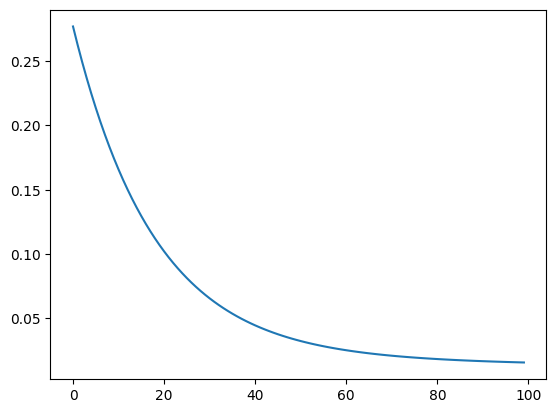

(array([0.82015506, 0.78816915]), 0.015813309382911644)

In [229]:
gradient_descent()

In [241]:
model = Sequential([
    Dense(1,input_shape = (X.shape[1],),activation = 'linear')
])

model.compile(optimizer='adam',metrics=['accuracy'],loss = 'mean_squared_error')

In [242]:
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 477ms/step - loss: 0.0407 - accuracy: 0.1000
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0400 - accuracy: 0.1000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.1000
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.1000
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0380 - accuracy: 0.1000
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0373 - accuracy: 0.1000
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0367 - accuracy: 0.1000
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.1000
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.1000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0348 - accuracy: 0.1000
Epoch 11/100
1/1 [===

1/1 [==============================] - 0s 20ms/step - loss: 0.0109 - accuracy: 0.1000
Epoch 84/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0108 - accuracy: 0.1000
Epoch 85/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0107 - accuracy: 0.1000
Epoch 86/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0106 - accuracy: 0.1000
Epoch 87/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 0.1000
Epoch 88/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0104 - accuracy: 0.1000
Epoch 89/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0103 - accuracy: 0.1000
Epoch 90/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.1000
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0102 - accuracy: 0.1000
Epoch 92/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0101 - accuracy: 0.1000
Epoch 93/100
1/1 [======

In [243]:
model.get_weights()

[array([[ 1.3492442 ],
        [-0.48422134]], dtype=float32),
 array([0.07441986], dtype=float32)]